<a href="https://colab.research.google.com/github/papandreas42/physics-informed-neural-nets/blob/papandreas42-patch-1/Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D poisson



Epoch: 1, Loss: 2.557
Epoch: 2, Loss: 2.340
Epoch: 3, Loss: 2.303
Epoch: 4, Loss: 2.272
Epoch: 5, Loss: 2.225
Epoch: 6, Loss: 2.182
Epoch: 7, Loss: 2.151
Epoch: 8, Loss: 2.126
Epoch: 9, Loss: 2.095
Epoch: 10, Loss: 2.052
Epoch: 11, Loss: 1.996
Epoch: 12, Loss: 1.934
Epoch: 13, Loss: 1.872
Epoch: 14, Loss: 1.817
Epoch: 15, Loss: 1.770
Epoch: 16, Loss: 1.727
Epoch: 17, Loss: 1.683
Epoch: 18, Loss: 1.639
Epoch: 19, Loss: 1.600
Epoch: 20, Loss: 1.568
Epoch: 21, Loss: 1.533
Epoch: 22, Loss: 1.491
Epoch: 23, Loss: 1.444
Epoch: 24, Loss: 1.397
Epoch: 25, Loss: 1.350
Epoch: 26, Loss: 1.305
Epoch: 27, Loss: 1.267
Epoch: 28, Loss: 1.236
Epoch: 29, Loss: 1.207
Epoch: 30, Loss: 1.181
Epoch: 31, Loss: 1.161
Epoch: 32, Loss: 1.141
Epoch: 33, Loss: 1.119
Epoch: 34, Loss: 1.096
Epoch: 35, Loss: 1.070
Epoch: 36, Loss: 1.039
Epoch: 37, Loss: 1.006
Epoch: 38, Loss: 0.970
Epoch: 39, Loss: 0.930
Epoch: 40, Loss: 0.888
Epoch: 41, Loss: 0.844
Epoch: 42, Loss: 0.798
Epoch: 43, Loss: 0.755
Epoch: 44, Loss: 0.

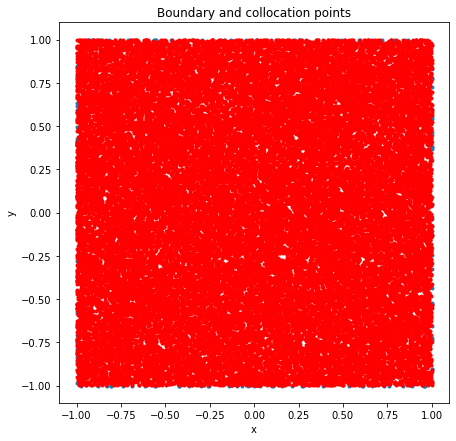

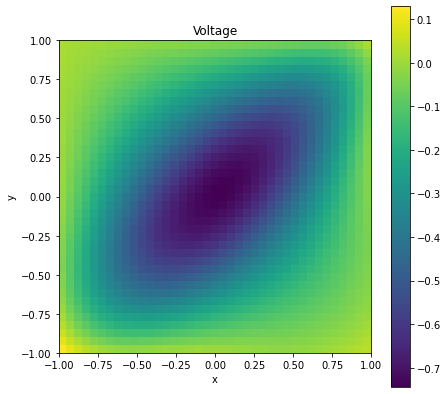

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

frequency=100  #sampling frequency
collocation=50 #number of collocation points

###random sampling from a line
def sample(fro , to, frequency):   #returns frequency number of samples per unit of length
  return np.random.random_sample( (to-fro)*frequency)*(to-fro)+fro

def sample_from_square(limits, sampling_density): 
###limits: tuple that holds the limits of the rectangle i.e. (-1,1,-2,2 ) for a rectangle from x=-1 to x=1 and y=-2 to y=2
###sampling_density: number of points per unit surface

  number_of_points=int((limits[1]-limits[0])*(limits[3]-limits[2])*sampling_density)
  x=np.random.random_sample(number_of_points)*(limits[1]-limits[0])+limits[0]
  y=np.random.random_sample(number_of_points)*(limits[3]-limits[2])+limits[2]
  toRet=np.zeros((number_of_points, 2))
  toRet[:,0]=x
  toRet[:,1]=y  
  return toRet

###obtain data by random sampling

def getData(limits , boundary_conditions, sample_frequency):
###limits: tuple that holds the limits of the rectangle i.e. (-1,1,-2,2 ) for a rectangle from x=-1 to x=1 and y=-2 to y=2
###boundary_conditions: tuple holding the value of u at the sides of the rectangle in format (V1, V2, V3, V4). V1, V2 are the values at the bottom and top sides of the rectangle respectively and V3,V4 are the values at the left and right sides of the rectangle.
###sampling_frequency: integer holding samples per unit lengthReturn: tuple (xy, u)

  """Returns
  xy: numpy array of 2 axes.
  i.e. : [ [x1, y1], [x2, y2] ,....., [xn, yn] ]

  u: numpy array of one axis holding the value of u at coordinates x, y."""


  points=np.zeros((0,2))
  x1=sample(limits[0], limits[1], sample_frequency)
  x2=sample(limits[0], limits[1], sample_frequency)
  y1=sample(limits[2], limits[3], sample_frequency)
  y2=sample(limits[2], limits[3], sample_frequency)
  side1=np.zeros((len(x1), 2))
  side2=np.zeros((len(x2), 2))
  side3=np.zeros((len(y1), 2))
  side4=np.zeros((len(y2), 2))

  side1[:,0]=x1
  side1[:,1]=limits[2]
  side2[:,0]=x2
  side2[:,1]=limits[3]
  side3[:,0]=limits[0]
  side3[:,1]=y1
  side4[:,0]=limits[1]
  side4[:,1]=y2

  points=np.append(points, side1, 0)
  points=np.append(points, side2, 0)
  points=np.append(points, side3, 0)
  points=np.append(points, side4, 0)

  u=np.zeros((0))
  u1=np.ones(len(x1))*boundary_conditions[0]
  u2=np.ones(len(x2))*boundary_conditions[1]
  u3=np.ones(len(y1))*boundary_conditions[2]
  u4=np.ones(len(y2))*boundary_conditions[3]

  u=np.append(u, u1, 0)
  u=np.append(u, u2, 0)
  u=np.append(u, u3, 0)
  u=np.append(u, u4, 0)



  return points, u

###obtain data and coordinates of collocation points
limits=(-1,1,-1,1)
boundary_conditions=(0.,0.,0.,0.)
boundary_sampling_frequency=20
collocation_density=10000

data=getData(limits, boundary_conditions, boundary_sampling_frequency)
x_coll=sample_from_square(limits, collocation_density)
x_train=data[0]
y_train=data[1]

###Visualizing Boundary and collocation points
plt.figure(figsize=[7,7])
plt.plot(x_train[:,0],x_train[:,1],".")
plt.plot(x_coll[:,0],x_coll[:,1],"r.")
plt.title("Boundary and collocation points")
plt.xlabel("x")
plt.ylabel("y")

#create the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation="tanh",input_shape=(2,)))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(20, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="tanh"))


#choose optimizer
optimizer = tf.keras.optimizers.Adam()


#physics informed part
def u(x):
  return model(x)

def f(x):
  with tf.GradientTape() as t0:
    t0.watch(x)
    with tf.GradientTape() as t:
      t.watch(x)
      u1=u(x)
    uprime=t.gradient(u1, x)
  usec=t0.gradient(uprime, x)
  u_x=uprime[:,0]
  u_y=uprime[:,1]
  u_xx=usec[:,0]
  u_yy=usec[:,1]
  q=tf.exp(-x[:,0]**2)+tf.exp(-x[:,1]**2)  ###charge distribution is gaussian centered at 0
  return u_xx+u_yy-q


#train the model 
# For each one of the iterations.
epochs=2000
xc=tf.constant(x_coll, tf.float32)
for epoch in range(epochs): 
    
    with tf.GradientTape() as tape :
        y_predicted=model(data[0])
        loss = tf.reduce_mean(tf.square(f(xc))) + tf.reduce_mean(tf.square(y_train-y_predicted)) ###loss function is MSE_u+MSE_f as shown in the paper
    #
    if (epoch+1)%1==0:
      print("\nEpoch: {}, Loss: {:.3f}".format(epoch+1, loss.numpy()), end = "")
    #
    grads = tape.gradient(loss, model.trainable_variables) # Calculate the derivatives.
    optimizer.apply_gradients(zip(grads, model.trainable_variables)) # Back propagations.

model.save("exp2000elu.h5")


x=np.linspace(limits[0], limits[1], 40)
y=np.linspace(limits[2], limits[3], 40)
X1=np.zeros((len(x),2))
X1[:,0]=x
X1[:,1]=y
Voltage=np.zeros((len(x),len(x)))
for i in range(len(x)):
  for j in range(len(x)):
    Voltage[i,j]= model.predict([[x[i],y[j]]])
X,Y=np.meshgrid(x,y,indexing="ij")
plt.figure(figsize=[7,7])
plt.pcolormesh(X,Y, Voltage,cmap="viridis")
plt.title("Voltage")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.gca().set_aspect('equal')     
plt.show()

np.save("pinnvoltage.npy",Voltage)


In [0]:
a=np.zeros((0,2))
b=np.array([[1.,2.],[3.,4.],[5.,6.]])
c=np.array([3.,4.])
a=np.append(a,b,0)
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(5, activation="elu", input_shape=(2,)))
model1.add(tf.keras.layers.Dense(1, activation="elu"))

def u(x):
  return model1(x)
#  return x[:,0]*x[:,0]*x[:,0]+2*x[:,1]**2
x=tf.constant(a)
print(x.numpy())
with tf.GradientTape() as t0:
  t0.watch(x)
  with tf.GradientTape() as t:
    t.watch(x)
    loss=u(x)
  uprime=t.gradient(loss, x)
usec=t0.gradient(uprime, x)


print(x)
print(uprime)
print(usec)

[[1. 2.]
 [3. 4.]
 [5. 6.]]
tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float64)
tf.Tensor(
[[-0.10931128  0.10886836]
 [ 0.04689764  0.14616154]
 [ 0.07011846  0.11944694]], shape=(3, 2), dtype=float64)
tf.Tensor(
[[ 0.18562274  0.03985268]
 [ 0.02552456 -0.0129047 ]
 [ 0.00472802 -0.01190044]], shape=(3, 2), dtype=float64)
